In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import binom

In [2]:
df_brazilian_population = pd.read_csv("brazilian_population.csv")

df_brazilian_population = df_brazilian_population.rename(columns={"Unnamed: 0": "ID", "estado": "state", "idade": "age", "escolaridade": "education", "nível de proficiência em inglês": "level_proficiency", "renda": "income", "sexo": "gender"})

df_brazilian_population["gender"] = df_brazilian_population["gender"].replace({"M": "Man", "F": "Woman"})
df_brazilian_population["level_proficiency"] = df_brazilian_population["level_proficiency"].replace({"Intermediário": "Intermediate", "Básico": "Basic", "Avançado": "Advanced"})
df_brazilian_population["education"] = df_brazilian_population["education"].replace({"Fundamental": "Elementary", "Superior": "Graduate", "Médio": "Secondary", "Pós-graduação": "Postgraduate"})

display(df_brazilian_population.head())
print(df_brazilian_population.columns)

,ID,state,age,education,level_proficiency,income,gender
0,0,MA,56,Elementary,Intermediate,4006.29,Woman
1,1,BA,46,Graduate,Basic,2423.11,Man
2,2,AM,32,Elementary,Intermediate,3835.69,Man
3,3,CE,60,Graduate,Basic,1870.29,Man
4,4,SE,25,Elementary,Advanced,3529.80,Man


Index(['ID', 'state', 'age', 'education', 'level_proficiency', 'income',
       'gender'],
      dtype='object')


In [3]:
# Checking null values per column
print(df_brazilian_population.isnull().sum())

ID                   0
state                0
age                  0
education            0
level_proficiency    0
income               0
gender               0
dtype: int64


In [4]:
# Question 1: Complementary probability of not being fluent in English

proficiency_column = "level_proficiency"

total_people = len(df_brazilian_population)
fluent = len(df_brazilian_population[df_brazilian_population[proficiency_column] == "Advanced"])
prob_not_fluent = 1 - (fluent / total_people)

print(f"- Complementary probability (non-fluent): {prob_not_fluent:.2%}")

- Complementary probability (non-fluent): 65.60%


In [5]:
# Question 2: Probability of income > 5k in Alagoas or Pará

state_column = "state"
income_column  = "income"

df_brazilian_population[income_column ] = pd.to_numeric(df_brazilian_population[income_column ], errors="coerce")
al_or_pa = df_brazilian_population[df_brazilian_population[state_column].isin(["AL", "PA"])]

total_al_pa = len(al_or_pa)
more_5k = len(al_or_pa[al_or_pa[income_column ] > 5000])

probabilityincome5k = more_5k / total_al_pa if total_al_pa > 0 else 0

print(f"- Probability of income > 5k in Alagoas/Pará: {probabilityincome5k:.2%}")

- Probability of income > 5k in Alagoas/Pará: 5.06%


In [6]:
# Question 3: Probability that one person from AM has graduation education and the fifth has it

education_column = "education"

amazonenses = df_brazilian_population[df_brazilian_population[state_column] == "AM"]

total_amazonenses = len(amazonenses)
graduate_amazonenses = len(amazonenses[amazonenses[education_column] == "Graduate"])

prob_general = graduate_amazonenses / total_amazonenses if total_amazonenses > 0 else 0
prob_4_not_higher = (1 - prob_general) ** 4
prob_fifth_amazonense = prob_4_not_higher * prob_general

print(f"- Probability for the 5th person: {prob_fifth_amazonense:.2%}")

- Probability for the 5th person: 8.03%


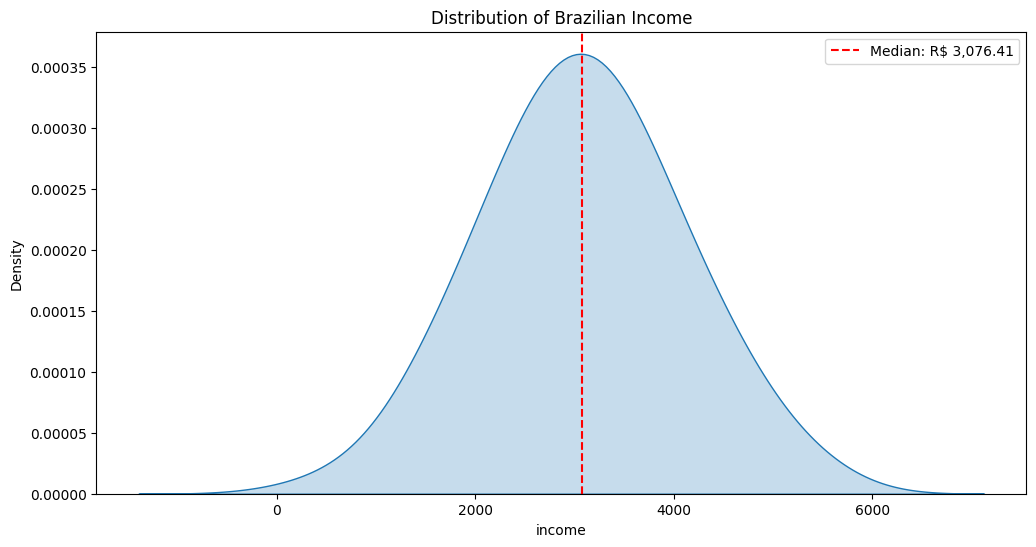

- Most common income range: R$ 3,000 - 4,499


In [7]:
# Question 4: Brazilian income range for the most part

income_range  = 1500

bins = np.arange(0, df_brazilian_population[income_column].max() + income_range , income_range )
labels = [f"R$ {i:,.0f} - {i+income_range -1:,.0f}" for i in bins[:-1]]
df_brazilian_population["income_range"] = pd.cut(df_brazilian_population[income_column], bins=bins, labels=labels, right=False)
most_common_range = df_brazilian_population["income_range"].value_counts().idxmax()

plt.figure(figsize=(12, 6))
sns.kdeplot(df_brazilian_population[income_column], bw_method=0.5, fill=True)
plt.axvline(x=df_brazilian_population[income_column].median(), color="red", linestyle="--", label=f"Median: R$ {df_brazilian_population[income_column].median():,.2f}")
plt.legend()
plt.title("Distribution of Brazilian Income")
plt.show()

print(f"- Most common income range: {most_common_range}")

- Average income: R$ 3,082.54, Variance: 993,156.23


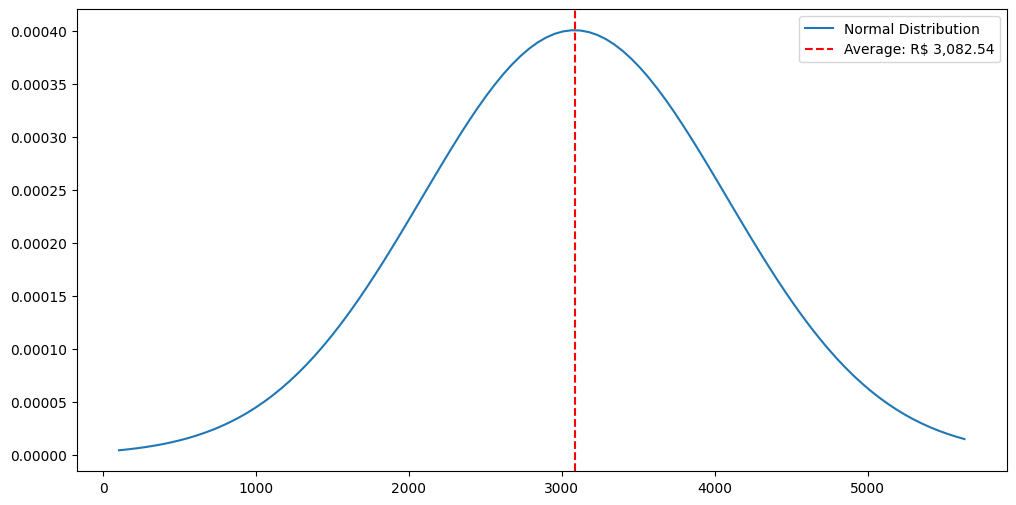

In [8]:
# Question 5: Mean, variance and normal distribution of income

average_income = df_brazilian_population[income_column].mean()
variance_income = df_brazilian_population[income_column].var()

print(f"- Average income: R$ {average_income:,.2f}, Variance: {variance_income:,.2f}")

plt.figure(figsize=(12, 6))

x = np.linspace(df_brazilian_population[income_column].min(), df_brazilian_population[income_column].max(), 100)
y = norm.pdf(x, average_income, np.sqrt(variance_income))

plt.plot(x, y, label="Normal Distribution")
plt.axvline(average_income, color="red", linestyle="--", label=f"Average: R$ {average_income:,.2f}")
plt.legend()
plt.show()

In [9]:
# Question 6: Probability of 243,000 people with postgraduate degrees out of 1 million

postgraduates = len(df_brazilian_population[df_brazilian_population[education_column] == "Postgraduate"])
prob_postgrad = postgraduates / total_people
prob_243k = norm.sf(243000, loc=prob_postgrad * 1000000, scale=np.sqrt(1000000 * prob_postgrad * (1 - prob_postgrad)))

print(f"- Probability of finding 243,000 people with postgraduate degrees: {prob_243k:.2%}")

- Probability of finding 243,000 people with postgraduate degrees: 100.00%


In [10]:
# Question 7: Cumulative density function (CDF) for schooling

cdf_education = df_brazilian_population[education_column].value_counts(normalize=True).sort_index().cumsum()

print("- Cumulative Density Function (CDF) for Schooling:")
print()
print(cdf_education.apply(lambda x: f"{x * 100:.2f}%"))

- Cumulative Density Function (CDF) for Schooling:

education
Elementary       26.60%
Graduate         50.90%
Postgraduate     76.20%
Secondary       100.00%
Name: proportion, dtype: object


In [11]:
# Question 8: Margin of error for intermediate English

intermediate_english = len(df_brazilian_population[df_brazilian_population[proficiency_column] == "Intermediate"]) / total_people
margin_error = 1.96 * np.sqrt((intermediate_english * (1 - intermediate_english)) / total_people)

print(f"- Margin of error for English intermediate: {margin_error:.2%}")

- Margin of error for English intermediate: 2.91%


In [12]:
# Question 9: Probability of finding 60 people with an income R$ 1000 above the average

probability_above_average = sum(df_brazilian_population[income_column] > average_income + 1000) / total_people

print(f"- Probability of income above average + R$ 1000: {probability_above_average:.2%}")
print(f"- Total people in sample: {total_people}")

prob_60_people = binom.sf(59, total_people, probability_above_average)

- Probability of income above average + R$ 1000: 16.10%
- Total people in sample: 1000


In [13]:
# Question 10: Probability of a man from the Southeast with primary education and income > 2k

southeast_regions = ["SP", "RJ", "MG", "ES"]
men_southeast = df_brazilian_population[(df_brazilian_population["state"].isin(southeast_regions)) & (df_brazilian_population["gender"] == "Man") & (df_brazilian_population[education_column] == "Elementary")]

total_men_southeast = len(men_southeast)
men_southeast_income_2k = men_southeast[men_southeast[income_column] > 2000]

count_income_2k = len(men_southeast_income_2k)

if total_men_southeast > 0:

    proportion = count_income_2k / total_men_southeast

    percentage = proportion * 100

    confidence_interval = st.binom.interval(0.95, total_men_southeast, proportion)

    print(f"- Total men from Southeast with elementary education: {total_men_southeast}")
    print(f"- Total men that have income greater than 2000: {count_income_2k}")
    print(f"- Percentage of men with income > 2k: {percentage:.2f}%")
    print(f"- 95% Confidence Interval (proportion): {confidence_interval}")
else:
    print("No data available for the specified criteria.")

- Total men from Southeast with elementary education: 19
- Total men that have income greater than 2000: 19
- Percentage of men with income > 2k: 100.00%
- 95% Confidence Interval (proportion): (np.float64(19.0), np.float64(19.0))
